<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.446001,30.772905,67.722714,46.529950,614.171979,857.643549,615.986503,241.657046
1,0.0,1.0,80.929627,89.144406,73.270371,74.749025,-1127.993970,-799.900541,416.725327,-1216.625868
2,0.0,2.0,35.552752,79.330885,82.450846,59.696774,1618.305723,1885.336980,386.070722,1499.266258
3,0.0,3.0,40.392835,85.375301,98.458714,86.434377,-1641.135894,-1320.474668,521.953755,-1842.428423
4,0.0,4.0,86.882254,92.689778,39.495828,52.072062,2149.132818,2430.272740,95.865703,2334.407037
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.627521,31.487479,35.317895,70.937705,-880.398416,-646.027816,272.158192,-918.186009
249996,999.0,246.0,46.075932,95.034446,37.896679,43.576156,-2873.041626,-2640.458413,912.316424,-3552.774837
249997,999.0,247.0,52.549205,48.346097,33.142141,65.804075,268.471473,478.312991,464.146241,14.166751
249998,999.0,248.0,26.883832,89.663074,95.095451,55.011409,350.467377,627.121142,495.059776,132.061366


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.446001  30.772905  67.722714  46.529950   614.171979   
      1.0    80.929627  89.144406  73.270371  74.749025 -1127.993970   
      2.0    35.552752  79.330885  82.450846  59.696774  1618.305723   
      3.0    40.392835  85.375301  98.458714  86.434377 -1641.135894   
      4.0    86.882254  92.689778  39.495828  52.072062  2149.132818   
...                ...        ...        ...        ...          ...   
999.0 245.0  86.627521  31.487479  35.317895  70.937705  -880.398416   
      246.0  46.075932  95.034446  37.896679  43.576156 -2873.041626   
      247.0  52.549205  48.346097  33.142141  65.804075   268.471473   
      248.0  26.883832  89.663074  95.095451  55.011409   350.467377   
      249.0  51.072969  84.746894  83.771478  25.158912  2754.698288   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     857.643549  615.986503   241.657046  
      1.0    -799.900541  416.725327 -1216.625868  
      2.0    1885.336980  386.070722  1499.266258  
      3.0   -1320.474668  521.953755 -1842.428423  
      4.0    2430.272740   95.865703  2334.407037  
...                  ...         ...          ...  
999.0 245.0  -646.027816  272.158192  -918.186009  
      246.0 -2640.458413  912.316424 -3552.774837  
      247.0   478.312991  464.146241    14.166751  
      248.0   627.121142  495.059776   132.061366  
      249.0  3009.448541  520.346202  2489.102339  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.446001  30.772905  67.722714  46.529950   614.171979   
      1.0    80.929627  89.144406  73.270371  74.749025 -1127.993970   
      2.0    35.552752  79.330885  82.450846  59.696774  1618.305723   
      3.0    40.392835  85.375301  98.458714  86.434377 -1641.135894   
      4.0    86.882254  92.689778  39.495828  52.072062  2149.132818   
...                ...        ...        ...        ...          ...   
999.0 245.0  86.627521  31.487479  35.317895  70.937705  -880.398416   
      246.0  46.075932  95.034446  37.896679  43.576156 -2873.041626   
      247.0  52.549205  48.346097  33.142141  65.804075   268.471473   
      248.0  26.883832  89.663074  95.095451  55.011409   350.467377   
      249.0  51.072969  84.746894  83.771478  25.158912  2754.698288   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     857.643549  615.986503   241.657046  
      1.0    -799.900541  416.725327 -1216.625868  
      2.0    1885.336980  386.070722  1499.266258  
      3.0   -1320.474668  521.953755 -1842.428423  
      4.0    2430.272740   95.865703  2334.407037  
...                  ...         ...          ...  
999.0 245.0  -646.027816  272.158192  -918.186009  
      246.0 -2640.458413  912.316424 -3552.774837  
      247.0   478.312991  464.146241    14.166751  
      248.0   627.121142  495.059776   132.061366  
      249.0  3009.448541  520.346202  2489.102339  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.446001,30.772905,67.722714,46.529950,614.171979,857.643549,615.986503,241.657046
1,0.0,1.0,80.929627,89.144406,73.270371,74.749025,-1127.993970,-799.900541,416.725327,-1216.625868
2,0.0,2.0,35.552752,79.330885,82.450846,59.696774,1618.305723,1885.336980,386.070722,1499.266258
3,0.0,3.0,40.392835,85.375301,98.458714,86.434377,-1641.135894,-1320.474668,521.953755,-1842.428423
4,0.0,4.0,86.882254,92.689778,39.495828,52.072062,2149.132818,2430.272740,95.865703,2334.407037
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.627521,31.487479,35.317895,70.937705,-880.398416,-646.027816,272.158192,-918.186009
249996,999.0,246.0,46.075932,95.034446,37.896679,43.576156,-2873.041626,-2640.458413,912.316424,-3552.774837
249997,999.0,247.0,52.549205,48.346097,33.142141,65.804075,268.471473,478.312991,464.146241,14.166751
249998,999.0,248.0,26.883832,89.663074,95.095451,55.011409,350.467377,627.121142,495.059776,132.061366


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.446001  30.772905  67.722714  46.529950   614.171979   
      1.0    80.929627  89.144406  73.270371  74.749025 -1127.993970   
      2.0    35.552752  79.330885  82.450846  59.696774  1618.305723   
      3.0    40.392835  85.375301  98.458714  86.434377 -1641.135894   
      4.0    86.882254  92.689778  39.495828  52.072062  2149.132818   
...                ...        ...        ...        ...          ...   
999.0 245.0  86.627521  31.487479  35.317895  70.937705  -880.398416   
      246.0  46.075932  95.034446  37.896679  43.576156 -2873.041626   
      247.0  52.549205  48.346097  33.142141  65.804075   268.471473   
      248.0  26.883832  89.663074  95.095451  55.011409   350.467377   
      249.0  51.072969  84.746894  83.771478  25.158912  2754.698288   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0     857.643549  615.986503   241.657046  
      1.0    -799.900541  416.725327 -1216.625868  
      2.0    1885.336980  386.070722  1499.266258  
      3.0   -1320.474668  521.953755 -1842.428423  
      4.0    2430.272740   95.865703  2334.407037  
...                  ...         ...          ...  
999.0 245.0  -646.027816  272.158192  -918.186009  
      246.0 -2640.458413  912.316424 -3552.774837  
      247.0   478.312991  464.146241    14.166751  
      248.0   627.121142  495.059776   132.061366  
      249.0  3009.448541  520.346202  2489.102339  

[250000 rows x 8 columns]

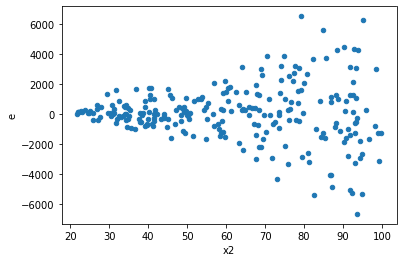

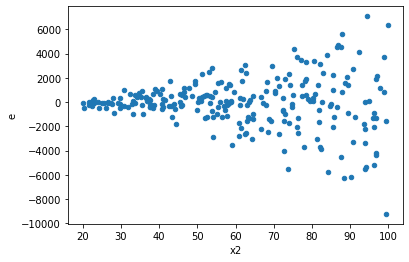

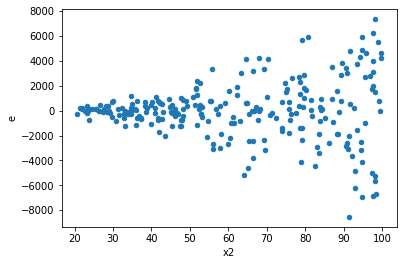

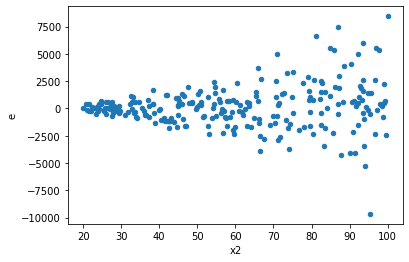

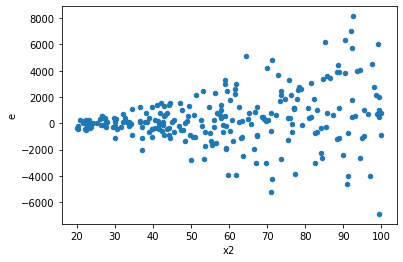

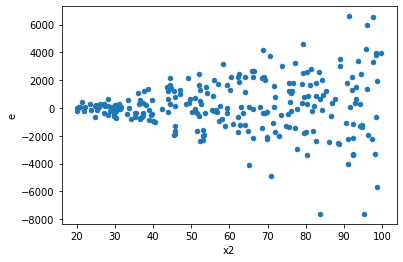

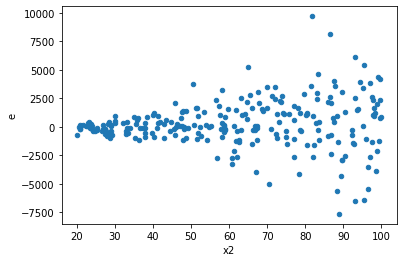

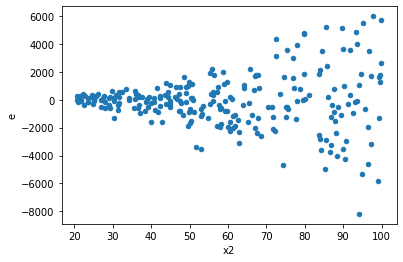

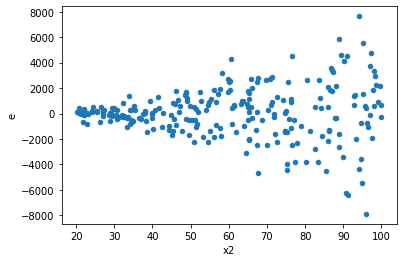

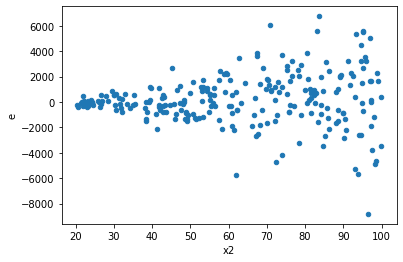

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,112.0,130.0,341026406.47330713,489791248.9347496,3044878.6292259567,3767624.9918057662,1.2373645884084188,0.24109392533165863,0.8794530373341707,0.12054696266582932,Reject001=1 : Homoscedasticity
1.0,137.0,105.0,385437079.84371656,647144864.7511774,2813409.3419249384,6163284.42620169,2.1906817235435647,3.514764677703397e-05,0.9999824261766115,1.7573823388516985e-05,Reject001=0 : Heteroscedasticity
5.0,131.0,111.0,200038361.16697192,688134522.4172937,1527010.390587572,6199410.111867511,4.059834923246374,4.105604745063829e-13,0.9999999999997947,2.0528023725319144e-13,Reject001=0 : Heteroscedasticity
8.0,133.0,109.0,179388957.17488497,809993651.7880924,1348789.1516908645,7431134.420074242,5.509485608449956,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
15.0,125.0,117.0,318025523.1656997,745836280.7634223,2544204.185325598,6374669.066354036,2.505565041957601,8.285527894891231e-07,0.9999995857236053,4.1427639474456157e-07,Reject001=0 : Heteroscedasticity
17.0,123.0,119.0,315807315.33875704,763990559.2385012,2567539.1490955856,6420088.733096649,2.500483287804247,8.105716708950439e-07,0.9999995947141646,4.0528583544752195e-07,Reject001=0 : Heteroscedasticity
18.0,104.0,138.0,131770514.83388291,835215788.9017245,1267024.181095028,6052288.325374815,4.7767741260818815,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
21.0,126.0,116.0,286659072.4264193,552804386.4605817,2275072.0033842805,4765555.0556946695,2.094683178644752,6.66324314830824e-05,0.9999666837842585,3.33162157415412e-05,Reject001=0 : Heteroscedasticity
23.0,118.0,124.0,339432539.1723819,520576527.51006246,2876546.9421388293,4198197.802500504,1.4594574282799548,0.038169897616884274,0.9809150511915579,0.019084948808442137,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,112.0,130.0,341026406.47330713,489791248.9347496,3044878.6292259567,3767624.9918057662,1.2373645884084188,0.24109392533165863,Reject001=1 : Homoscedasticity
1.0,137.0,105.0,385437079.84371656,647144864.7511774,2813409.3419249384,6163284.42620169,2.1906817235435647,3.514764677703397e-05,Reject001=0 : Heteroscedasticity
2.0,137.0,105.0,1142664235.750251,192389180.20199248,8340614.859490884,1832277.9066856427,0.2196813949034791,3.635878004690962e-16,Reject001=0 : Heteroscedasticity
3.0,121.0,121.0,864313639.4880584,97343807.68799955,7143087.929653375,804494.2784132194,0.1126255600289465,2.4907349387372893e-28,Reject001=0 : Heteroscedasticity
4.0,98.0,144.0,724109282.9640663,208755140.6186016,7388870.234327206,1449688.4765180666,0.1961989357700593,1.3302652420606412e-15,Reject001=0 : Heteroscedasticity
5.0,131.0,111.0,200038361.16697192,688134522.4172937,1527010.390587572,6199410.111867511,4.059834923246374,4.105604745063829e-13,Reject001=0 : Heteroscedasticity
6.0,138.0,104.0,1021972548.5909855,65376574.66261232,7405598.178195547,628620.9102174261,0.08488455558772921,5.530193367396876e-37,Reject001=0 : Heteroscedasticity
7.0,150.0,92.0,742565764.5817648,157238957.2378512,4950438.430545099,1709119.100411426,0.34524600687200807,6.872885487046485e-09,Reject001=0 : Heteroscedasticity
8.0,133.0,109.0,179388957.17488497,809993651.7880924,1348789.1516908645,7431134.420074242,5.509485608449956,2.220446049250313e-16,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    685
Reject001=1 : Homoscedasticity      315
Name: Result_test, dtype: int64